In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.models.implicits import MFN

In [4]:

model = MFN(
    in_dim=1,
    hidden_dim=12,
    out_dim=1,
    k=3,
    weight_scale=6,
    input_scales=[128],
    filter_fun='Fourier'
)
print(model)

MFN(
  (filters): ModuleList(
    (0): FourierFilter(
      (linear): Linear(in_features=1, out_features=12, bias=True)
    )
    (1): FourierFilter(
      (linear): Linear(in_features=1, out_features=12, bias=True)
    )
    (2): FourierFilter(
      (linear): Linear(in_features=1, out_features=12, bias=True)
    )
  )
  (linear): ModuleList(
    (0): Linear(in_features=12, out_features=12, bias=True)
    (1): Linear(in_features=12, out_features=12, bias=True)
    (2): Linear(in_features=12, out_features=1, bias=True)
  )
)


torch.Size([12, 1])


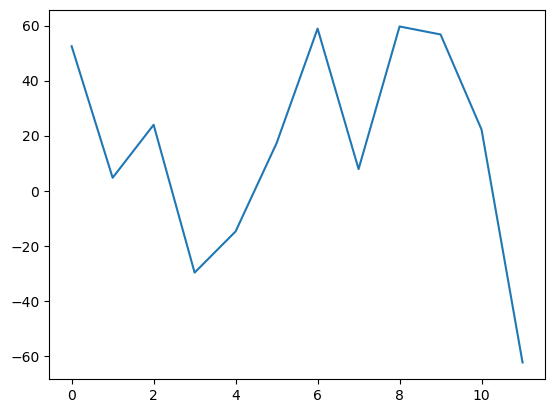

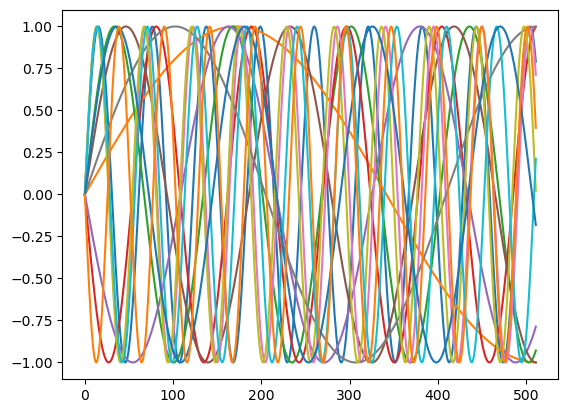

torch.Size([12, 1])


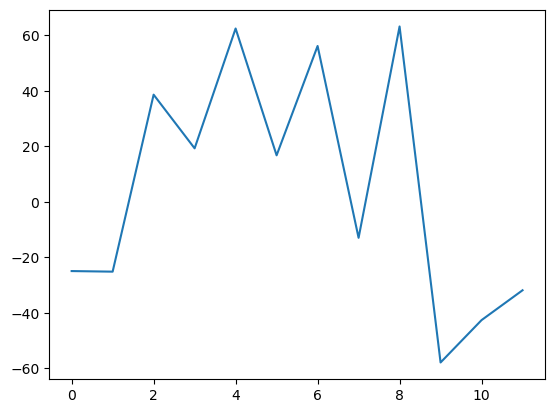

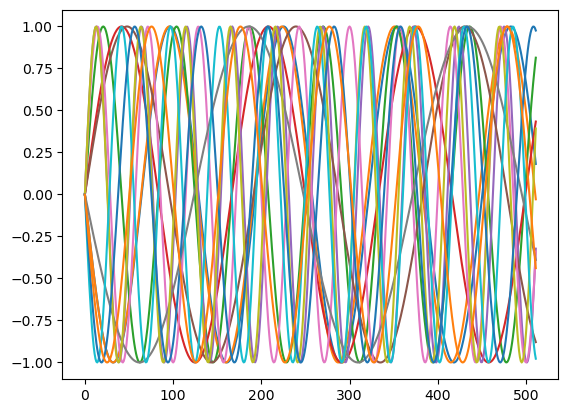

torch.Size([12, 1])


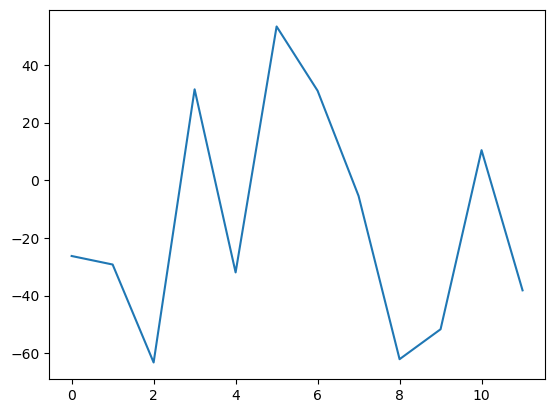

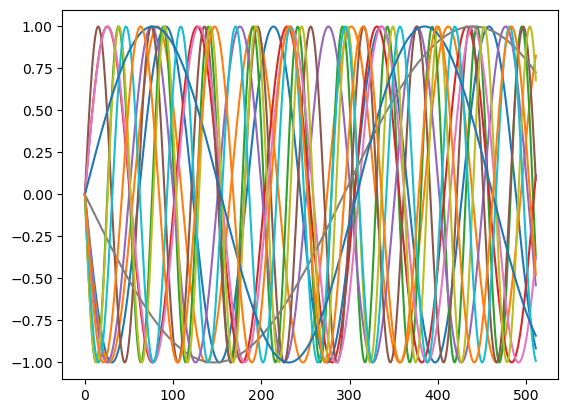

In [5]:
x = torch.linspace(0, 1, 512)[:,None]

for k in range(len(model.filters)):
    w = model.filters[k].linear.weight.data
    print(w.shape)
    plt.plot(w)
    plt.show()
    
    plt.plot(torch.sin(x @ w.T))
    plt.show()

In [12]:
hidden_layers = 4
frequency = [128, 128]
quantization_interval = 2 * np.pi        
        
input_scale = [round((np.pi * freq / (hidden_layers + 1))
                / quantization_interval) * quantization_interval for freq in frequency]
print(input_scale)
round((np.pi * 128 / (hidden_layers + 1))/ quantization_interval)

[81.68140899333463, 81.68140899333463]


13

In [13]:
360/12

30.0